## This notebook lets us look at intensity difference error, first for some low-ish resolution simulations that mimic the single pillar experiment. Then we look at some of our data samples and examine intensity difference error.

In [5]:
import pickle
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [6]:
def get_table(results):
    
    df = pd.DataFrame(results)
    df.index = [2881,1650,1550,1300,1060]
    
    wavelengths = [2881, 1650, 1550, 1300, 1060]
    num = len(results['final'][0])
    radii = np.linspace(0.075, 0.250, num)
    
    for i, radius in enumerate(radii):
        column_name = f'I_final (Rad {radius:.3f})'
        df[column_name] = [row[i] for row in df['final']]
        column_name_diff = f'Diff (Rad {radius:.3f})'
        column_name_final = f'I_final (Rad {radius:.3f})'
        df[column_name_diff] = df[column_name_final] - df['initial']
    for i, radius in enumerate(radii):
        column_name = f'Trans (Rad {radius:.3f})'
        df[column_name] = [row[i] for row in df['transmission']]
    
    df.rename(columns={"initial":"I_0"},inplace=True)
    cols = ['final','transmission', 'Trans (Rad 0.075)', 'Trans (Rad 0.162)', 'Trans (Rad 0.250)']
    column_sums = df.sum(numeric_only=True)
    df.loc['Sum'] = column_sums
    display(df.drop(columns=cols))# initial_sum = df['initial'].sum()
    return df['I_0']

In [7]:
results = pickle.load(open("temp/final_results.pkl","rb")) # resolution 10
get_table(results)

,I_0,I_final (Rad 0.075),Diff (Rad 0.075),I_final (Rad 0.162),Diff (Rad 0.162),I_final (Rad 0.250),Diff (Rad 0.250)
2881,0.000021,0.000021,-4.012490e-07,0.000021,4.321348e-07,0.000022,8.320481e-07
1650,0.019483,0.021202,1.719709e-03,0.017451,-2.031574e-03,0.018226,-1.256979e-03
1550,0.024232,0.025599,1.366953e-03,0.023622,-6.100298e-04,0.020821,-3.410582e-03
1300,0.012170,0.013324,1.154094e-03,0.013403,1.232797e-03,0.012612,4.419325e-04
1060,0.000138,0.000135,-3.206617e-06,0.000137,-7.495238e-07,0.000131,-6.405700e-06
Sum,0.056043,0.060280,4.237149e-03,0.054634,-1.409124e-03,0.051812,-4.231202e-03


2881    0.000021
1650    0.019483
1550    0.024232
1300    0.012170
1060    0.000138
Sum     0.056043
Name: I_0, dtype: float64

In [8]:
# let's do resolution of 30 and compare
results = pickle.load(open("temp/final_res_res_30.pkl","rb"))
get_table(results)

,I_0,I_final (Rad 0.075),Diff (Rad 0.075),I_final (Rad 0.162),Diff (Rad 0.162),I_final (Rad 0.250),Diff (Rad 0.250)
2881,0.000021,0.000023,0.000002,0.000022,0.000001,0.000025,0.000004
1650,0.020491,0.022063,0.001572,0.019307,-0.001184,0.018070,-0.002421
1550,0.025657,0.023297,-0.002360,0.020010,-0.005646,0.024783,-0.000874
1300,0.013189,0.012898,-0.000291,0.013109,-0.000080,0.013492,0.000303
1060,0.000155,0.000167,0.000011,0.000140,-0.000016,0.000164,0.000009
Sum,0.059513,0.058448,-0.001065,0.052587,-0.006926,0.056534,-0.002979


2881    0.000021
1650    0.020491
1550    0.025657
1300    0.013189
1060    0.000155
Sum     0.059513
Name: I_0, dtype: float64

In [9]:
# let's do resolution of 50 and compare
res = pickle.load(open("temp/final_results_res50.pkl","rb"))
get_table(res)

,I_0,I_final (Rad 0.075),Diff (Rad 0.075),I_final (Rad 0.162),Diff (Rad 0.162),I_final (Rad 0.250),Diff (Rad 0.250)
2881,0.000021,0.000024,0.000002,0.000024,0.000002,0.000024,0.000003
1650,0.020591,0.022435,0.001844,0.020060,-0.000531,0.017829,-0.002762
1550,0.025799,0.023730,-0.002069,0.020748,-0.005051,0.025202,-0.000597
1300,0.013294,0.013196,-0.000098,0.013224,-0.000070,0.013641,0.000347
1060,0.000157,0.000168,0.000011,0.000142,-0.000015,0.000168,0.000011
Sum,0.059863,0.059553,-0.000309,0.054198,-0.005665,0.056864,-0.002999


2881    0.000021
1650    0.020591
1550    0.025799
1300    0.013294
1060    0.000157
Sum     0.059863
Name: I_0, dtype: float64

In [10]:
results = pickle.load(open("temp/final_results_LPA.pkl","rb")) # resolution = 50 for this set of results
I_0 = get_table(results)

# these results are "even more zero" than the results with non-uniform pillars. this supports the idea that we have
# some frequency shifting happening when you break LPA

,I_0,I_final (Rad 0.075),Diff (Rad 0.075),I_final (Rad 0.162),Diff (Rad 0.162),I_final (Rad 0.250),Diff (Rad 0.250)
2881,0.000021,0.000021,-6.789286e-09,0.000021,-1.181958e-07,0.000020,-0.000002
1650,0.020591,0.020593,1.789998e-06,0.019307,-1.284159e-03,0.017558,-0.003033
1550,0.025799,0.025799,-5.501471e-07,0.024083,-1.716236e-03,0.023781,-0.002019
1300,0.013294,0.013287,-6.530022e-06,0.012896,-3.973984e-04,0.009726,-0.003568
1060,0.000157,0.000157,1.797472e-07,0.000143,-1.384334e-05,0.000004,-0.000153
Sum,0.059863,0.059858,-5.117213e-06,0.056451,-3.411755e-03,0.051088,-0.008775


In [11]:
# let's look at some of our data samples

In [12]:
import os
samples = []
count = 0

with os.scandir("/develop/data/spie_journal_2023/kube_dataset") as entries:
    for entry in entries:
        if entry.is_file() and entry.name.endswith(".pkl"):
            count += 1
            # if count > 10:
            #     break
            samples.append(pickle.load(open(entry, "rb")))
print(count)
I_0 = I_0.tolist()
I_0 = I_0[:-1]
print(I_0)

41
[2.133954817261386e-05, 0.020591382539901358, 0.02579922487539837, 0.013293813343678174, 0.00015713650643846212]


In [13]:
import sys
import yaml
sys.path.append("../")
from core import preprocess_data as pp
from utils import parameter_manager

params = yaml.load(open('../../src/config.yaml'), Loader = yaml.FullLoader).copy()
pm = parameter_manager.ParameterManager(params=params)


def get_intensity(Ex, Ey, Ez):
    #print(Ex.shape)
    E_0 = np.sqrt((abs(Ex)**2 + abs(Ey)**2 + abs(Ez)**2))
    I = 0.5 * E_0**2
    return(np.mean(I))

def get_initial_xyz(initial_dft, mon_slice):
    initial_x = initial_dft[0]
    initial_y = initial_dft[1]
    initial_z = initial_dft[2]
    
    initial_x = initial_x[:,:,mon_slice]
    initial_y = initial_y[:,:,mon_slice]
    initial_z = initial_z[:,:,mon_slice]
    return initial_x, initial_y, initial_z

I_final2881, I_final1650, I_final1550, I_final1300, I_final1060 = [], [], [], [], []
def get_lists(samples):
    for sample in samples:
        eps_data = sample['eps_data']
        nf = sample['near_fields_1550']['ex']
        mon_slice = pp.get_mon_slice(pm, eps_data=eps_data, nf=nf)
        
        dfts = [sample['near_fields_2881']['ex'], sample['near_fields_2881']['ey'], sample['near_fields_2881']['ez']]
        x,y,z = get_initial_xyz(dfts, mon_slice)
        I_final2881.append(get_intensity(x,y,z))
        
        dfts = [sample['near_fields_1650']['ex'], sample['near_fields_1650']['ey'], sample['near_fields_1650']['ez']]
        x,y,z = get_initial_xyz(dfts, mon_slice)
        I_final1650.append(get_intensity(x,y,z))
        
        dfts = [sample['near_fields_1550']['ex'], sample['near_fields_1550']['ey'], sample['near_fields_1550']['ez']]
        x,y,z = get_initial_xyz(dfts, mon_slice)
        I_final1550.append(get_intensity(x,y,z))
        
        dfts = [sample['near_fields_1300']['ex'], sample['near_fields_1300']['ey'], sample['near_fields_1300']['ez']]
        x,y,z = get_initial_xyz(dfts, mon_slice)
        I_final1300.append(get_intensity(x,y,z))
        
        dfts = [sample['near_fields_1060']['ex'], sample['near_fields_1060']['ey'], sample['near_fields_1060']['ez']]
        x,y,z = get_initial_xyz(dfts, mon_slice)
        I_final1060.append(get_intensity(x,y,z))

get_lists(samples)

initial_vals = {
    2881: I_0[0],
    1650: I_0[1],
    1550: I_0[2],
    1300: I_0[3],
    1060: I_0[4],
}

results = {
    'final2881' : I_final2881,
    'final1650' : I_final1650,
    'final1550' : I_final1550,
    'final1300' : I_final1300,
    'final1060' : I_final1060,
}
print(initial_vals)
print(len(results['final2881']))

Using MPI version 4.0, 1 processes
{2881: 2.133954817261386e-05, 1650: 0.020591382539901358, 1550: 0.02579922487539837, 1300: 0.013293813343678174, 1060: 0.00015713650643846212}
41


In [14]:
df = pd.DataFrame(results)
df = df.T
df.index = [2881,1650,1550,1300,1060]

initial_I = pd.Series(I_0, name ="I_0")
df.insert(0, 'I_0', I_0)

columns_to_process = [col for col in df.columns if col != 'I_0']

# Iterate through the list of columns
for column_name in columns_to_process:
    column_name_diff = f'Diff {column_name}'
    
    # Calculate the difference and insert it after the corresponding column
    df.insert(df.columns.get_loc(column_name) + 1, column_name_diff, df[column_name] - df['I_0'])

pd.options.display.float_format = '{:.6f}'.format
display(df)

,I_0,0,Diff 0,1,Diff 1,2,Diff 2,3,Diff 3,4,...,36,Diff 36,37,Diff 37,38,Diff 38,39,Diff 39,40,Diff 40
2881,0.000021,0.000022,0.000000,0.000022,0.000000,0.000022,0.000000,0.000022,0.000001,0.000021,...,0.000022,0.000000,0.000023,0.000002,0.000026,0.000004,0.000023,0.000001,0.000026,0.000004
1650,0.020591,0.026780,0.006189,0.022453,0.001861,0.023310,0.002718,0.023545,0.002953,0.022045,...,0.018139,-0.002452,0.017790,-0.002802,0.019214,-0.001378,0.022310,0.001718,0.018586,-0.002006
1550,0.025799,0.025456,-0.000343,0.028727,0.002928,0.027249,0.001450,0.027311,0.001512,0.026663,...,0.022774,-0.003025,0.023225,-0.002574,0.025179,-0.000620,0.027030,0.001230,0.023641,-0.002158
1300,0.013294,0.015022,0.001728,0.015878,0.002584,0.014418,0.001124,0.014080,0.000786,0.017195,...,0.013565,0.000271,0.011805,-0.001489,0.013195,-0.000099,0.012808,-0.000485,0.012577,-0.000717
1060,0.000157,0.000124,-0.000033,0.000141,-0.000017,0.000117,-0.000040,0.000133,-0.000024,0.000124,...,0.000113,-0.000044,0.000112,-0.000045,0.000097,-0.000061,0.000124,-0.000033,0.000109,-0.000048


Index([2881, 1650, 1550, 1300, 1060], dtype='int64')


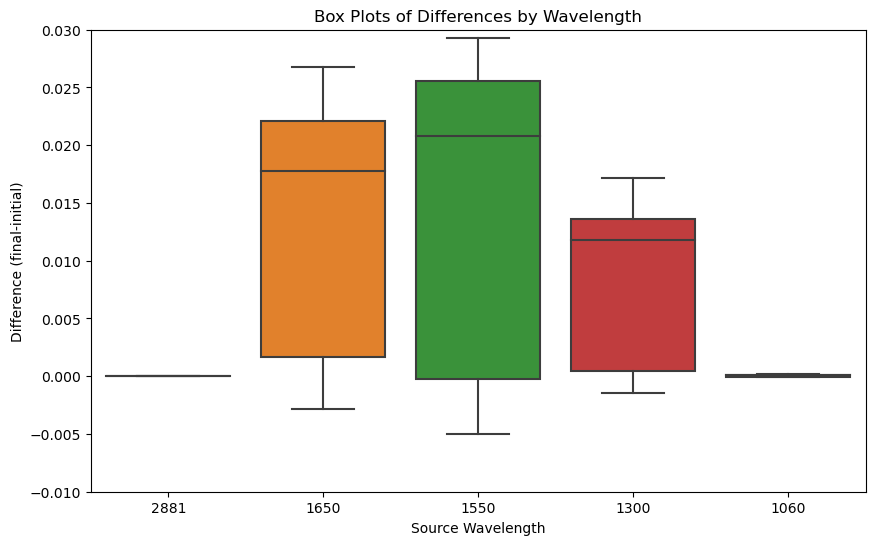

In [15]:
import seaborn as sns

df_t = df.T
print(df_t.columns)
#df_t.columns = ['I_0'] + list(df_t.columns)

# Create box plots using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_t, orient='v')
plt.title('Box Plots of Differences by Wavelength')
plt.xlabel('Source Wavelength')
plt.ylabel('Difference (final-initial)')
plt.ylim([-0.01, 0.03])
#plt.ylim([-0.0002, 0.0002])
plt.show()

In [20]:
I_0[0]

2.133954817261386e-05

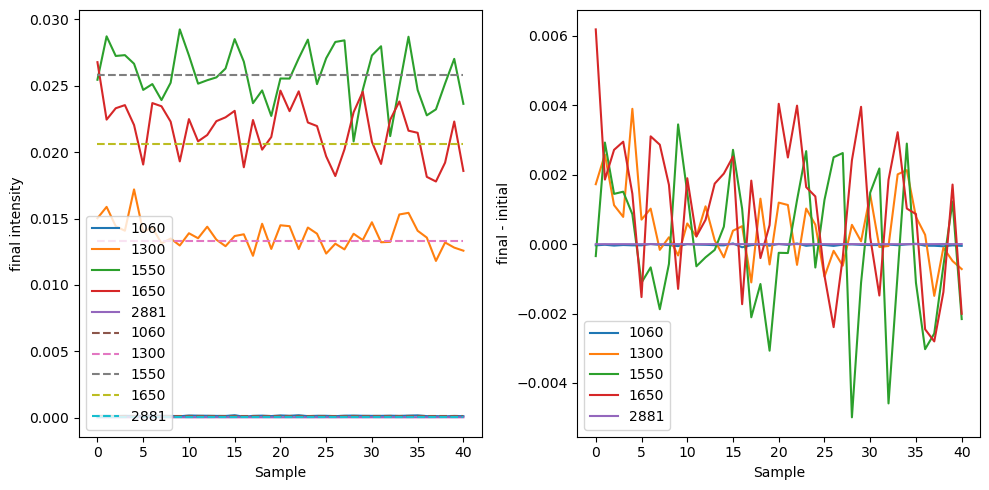

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
samples = [x for x in range(len(I_final1060))]
ax[0].plot(samples, I_final1060, label="1060")
ax[0].plot(samples, I_final1300, label="1300")
ax[0].plot(samples, I_final1550, label='1550')
ax[0].plot(samples, I_final1650, label='1650')
ax[0].plot(samples, I_final2881, label='2881')

initial2881 = [I_0[0] for _ in range(len(samples))]
initial1650 = [I_0[1] for _ in range(len(samples))]
initial1550 = [I_0[2] for _ in range(len(samples))]
initial1300 = [I_0[3] for _ in range(len(samples))]
initial1060 = [I_0[4] for _ in range(len(samples))]

ax[0].plot(samples, initial1060, label="1060", linestyle='dashed')
ax[0].plot(samples, initial1300, label="1300", linestyle='dashed')
ax[0].plot(samples, initial1550, label='1550', linestyle='dashed') 
ax[0].plot(samples, initial1650, label='1650', linestyle='dashed')
ax[0].plot(samples, initial2881, label='2881', linestyle='dashed')

ax[0].set_xlabel("Sample")
ax[0].set_ylabel("final intensity")
ax[0].legend(loc='lower left')

ax[1].plot(samples, [x - initial_vals[1060] for x in I_final1060], label="1060")
ax[1].plot(samples, [x - initial_vals[1300] for x in I_final1300], label="1300")
ax[1].plot(samples, [x - initial_vals[1550] for x in I_final1550], label='1550')
ax[1].plot(samples, [x - initial_vals[1650] for x in I_final1650], label='1650')
ax[1].plot(samples, [x - initial_vals[2881] for x in I_final2881], label='2881')
ax[1].set_xlabel("Sample")
ax[1].set_ylabel("final - initial")
ax[1].legend(loc='lower left')

fig.tight_layout()

In [18]:
len(samples)

41

In [23]:
df.columns

Index([    'I_0',         0,  'Diff 0',         1,  'Diff 1',         2,
        'Diff 2',         3,  'Diff 3',         4,  'Diff 4',         5,
        'Diff 5',         6,  'Diff 6',         7,  'Diff 7',         8,
        'Diff 8',         9,  'Diff 9',        10, 'Diff 10',        11,
       'Diff 11',        12, 'Diff 12',        13, 'Diff 13',        14,
       'Diff 14',        15, 'Diff 15',        16, 'Diff 16',        17,
       'Diff 17',        18, 'Diff 18',        19, 'Diff 19',        20,
       'Diff 20',        21, 'Diff 21',        22, 'Diff 22',        23,
       'Diff 23',        24, 'Diff 24',        25, 'Diff 25',        26,
       'Diff 26',        27, 'Diff 27',        28, 'Diff 28',        29,
       'Diff 29',        30, 'Diff 30',        31, 'Diff 31',        32,
       'Diff 32',        33, 'Diff 33',        34, 'Diff 34',        35,
       'Diff 35',        36, 'Diff 36',        37, 'Diff 37',        38,
       'Diff 38',        39, 'Diff 39',        40, 

In [40]:
exclude = [i for i in range(len(samples))]
df_ = df.drop(columns=exclude)
df_ = df_.drop(columns='I_0')

df_['Diff 0']

2881    0.000000
1650    0.006189
1550   -0.000343
1300    0.001728
1060   -0.000033
Name: Diff 0, dtype: float64

In [56]:
column_sums = df_.sum(numeric_only=True)
df_.loc['Sum'] = column_sums


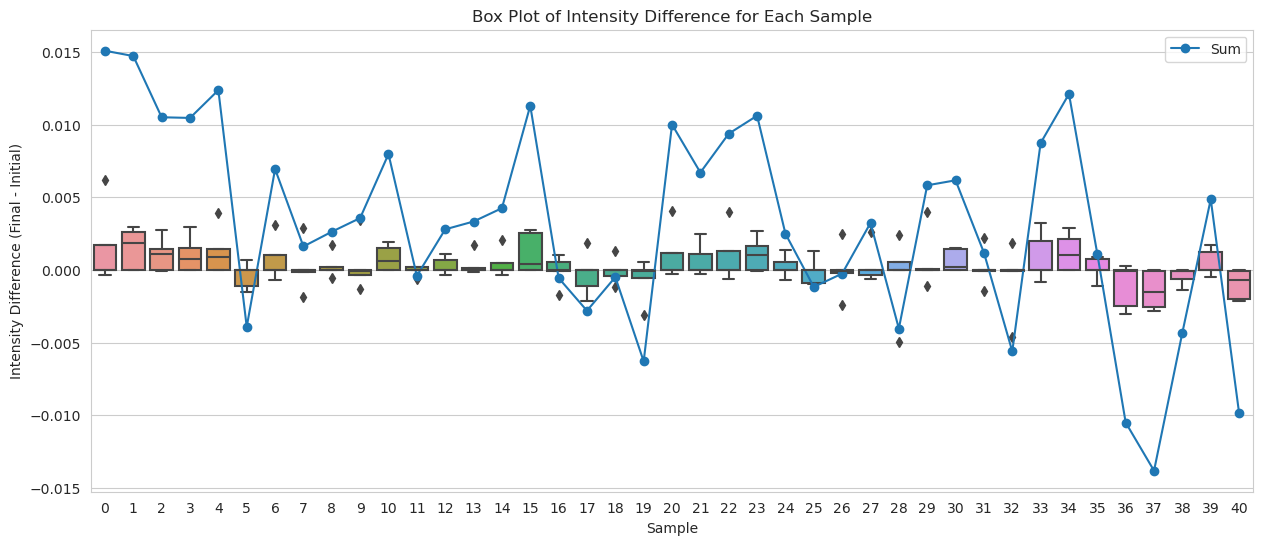

In [59]:
plt.figure(figsize=(15, 6))  # Adjust the figure size if needed

sns.set_style('whitegrid')
sns.boxplot(data = df_.drop('Sum'))

custom_labels = [str(i) for i in range(len(samples))]
plt.xticks(range(len(custom_labels)), custom_labels)
plt.xlabel('Sample')
plt.ylabel('Intensity Difference (Final - Initial)')
plt.title('Box Plot of Intensity Difference for Each Sample')

plt.plot(range(len(df_.columns)), df_.loc['Sum'], marker='o', label='Sum')
plt.legend()

In [61]:
display(df_)

,Diff 0,Diff 1,Diff 2,Diff 3,Diff 4,Diff 5,Diff 6,Diff 7,Diff 8,Diff 9,...,Diff 31,Diff 32,Diff 33,Diff 34,Diff 35,Diff 36,Diff 37,Diff 38,Diff 39,Diff 40
2881,0.000000,0.000000,0.000000,0.000001,0.000000,0.000001,0.000002,-0.000001,0.000002,0.000003,...,0.000001,0.000000,-0.000000,0.000000,0.000001,0.000000,0.000002,0.000004,0.000001,0.000004
1650,0.006189,0.001861,0.002718,0.002953,0.001453,-0.001525,0.003108,0.002867,0.001708,-0.001288,...,-0.001479,0.001852,0.003226,0.001027,0.000867,-0.002452,-0.002802,-0.001378,0.001718,-0.002006
1550,-0.000343,0.002928,0.001450,0.001512,0.000864,-0.001109,-0.000668,-0.001875,-0.000569,0.003451,...,0.002181,-0.004589,-0.000844,0.002899,-0.001114,-0.003025,-0.002574,-0.000620,0.001230,-0.002158
1300,0.001728,0.002584,0.001124,0.000786,0.003901,0.000707,0.001024,-0.000164,0.000199,-0.000325,...,-0.000082,-0.000051,0.002012,0.002134,0.000784,0.000271,-0.001489,-0.000099,-0.000485,-0.000717
1060,-0.000033,-0.000017,-0.000040,-0.000024,-0.000033,-0.000033,0.000005,-0.000020,-0.000027,-0.000055,...,-0.000025,-0.000012,-0.000029,-0.000006,0.000011,-0.000044,-0.000045,-0.000061,-0.000033,-0.000048
Sum,0.015082,0.014714,0.010504,0.010458,0.012370,-0.003916,0.006940,0.001615,0.002627,0.003570,...,0.001191,-0.005600,0.008730,0.012108,0.001098,-0.010501,-0.013814,-0.004306,0.004862,-0.009848


In [74]:
sum_initials = sum(I_0)

In [75]:
sum_finals_0 = df_['Diff 0'].sum() - df_.at['Sum','Diff 0']

In [76]:
sum_finals_0 / sum_initials

0.1259675195911234